# Linear Regression

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import r2_score

In [2]:
def  cal_cost(theta,X,y):
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [3]:
def gradient_descent(X,y,theta,learning_rate,iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,5))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

In [4]:
data = pd.read_csv("Datasets/Question-3/airfoil.csv", delimiter=',')

min_max_scaler = preprocessing.MinMaxScaler()

x = data.iloc[:,:-1]
x_data = x.values
x_scaled = min_max_scaler.fit_transform(x_data)
x1 = pd.DataFrame(x_scaled)

y = data.iloc[:,-1]
y_data = y.values.reshape((y.shape[0],1))
x_scaled = min_max_scaler.fit_transform(y_data)
y3 = pd.DataFrame(x_scaled)

In [17]:
lr = 0.01
n_iter = 1000
theta1 = np.random.randn(x.shape[1],1)
theta2 = np.random.randn(x.shape[1],1)
theta3 = np.random.randn(x.shape[1],1)
theta4 = np.random.randn(x.shape[1],1)

In [14]:
theta1,cost_history1,theta_history1 = gradient_descent(x1,y3,theta1,lr,n_iter)
theta2,cost_history2,theta_history2 = gradient_descent(x1,y3,theta2,lr,n_iter)
theta3,cost_history3,theta_history3 = gradient_descent(x1,y3,theta3,lr,n_iter)

In [11]:
itr = [i for i in range(1, 1001)]

### Using 3 different initial regression coefficients (weights) for fixed value of learning parameter (All 3 in single plot).

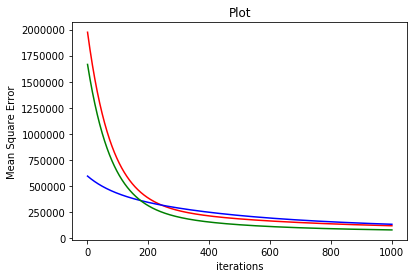

In [16]:
plt.plot(itr, cost_history1, color='red') 
plt.plot(itr, cost_history2, color='blue') 
plt.plot(itr, cost_history3, color='green') 
plt.xlabel('iterations')
plt.ylabel('Mean Square Error')
plt.title('Plot')
plt.show()

In [24]:
lr4 = 0.001
lr5 = 0.01 
lr6 = 0.5
n_iter1 = 10000
itr1 = [i for i in range(1, 10001)]

In [25]:
theta4,cost_history4,theta_history4 = gradient_descent(x1,y3,theta4,lr4,n_iter1)
theta5,cost_history5,theta_history5 = gradient_descent(x1,y3,theta4,lr5,n_iter1)
theta6,cost_history6,theta_history6 = gradient_descent(x1,y3,theta4,lr6,n_iter1)

### Using 3 different learning parameters for some fixed initial regression coeffi- cients. (All 3 in single plot)

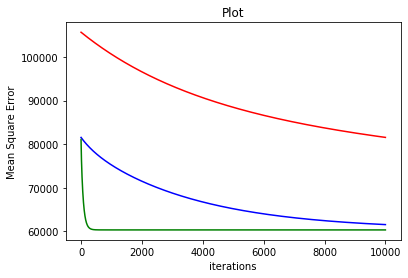

In [26]:
plt.plot(itr1, cost_history4, color='red') 
plt.plot(itr1, cost_history5, color='blue') 
plt.plot(itr1, cost_history6, color='green') 
plt.xlabel('iterations')
plt.ylabel('Mean Square Error')
plt.title('Plot')
plt.show()

In [27]:
y_pred = x1.dot(theta6)


In [30]:
r2_score(y3, y_pred)

-1.4423780420248833

### If you want to apply regression on some dataset but one of it’s features has missing values under below given conditions, how will you approach the problem. 

- 0-0.5% we can exclude those rows from training and it would not affect our model 
- 8-10% we can take an educated guess as to what was in that like mean or mode
- 60-70% we don't use the given feature as it will just be a hindrance